In [ ]:
from google.colab import auth
import pandas as pd
from google.cloud import bigquery

# Authenticate and initialize BigQuery client
auth.authenticate_user()
client = bigquery.Client(project="golden-photon-448607-m7")

# Load data from BigQuery
query = """SELECT * FROM `golden-photon-448607-m7.incident_data.incident_calls` LIMIT 1000"""
df = client.query(query).to_dataframe()

# Display first few rows
df.head()


_id Incident_No   Date_Time_Of_Event Dispatched_Time Unit_On_The_Way_Time  \
0  2055  F250079129  01/07/2025 11:27 AM            None                 None   
1  4994  F250169130  01/16/2025 10:49 AM            None                 None   
2  6341  F250209119  01/20/2025 10:56 AM            None                 None   
3  7875  F250249299  01/24/2025 07:53 PM            None                 None   
4  9101  F250289216  01/28/2025 04:50 PM            None                 None   

  Unit_On_Scene_TimeStamp On_Scene_Unit    Cleared_TimeStamp  Unit_Count  \
0                    None          None  01/07/2025 11:36 AM           2   
1                    None          None  01/16/2025 10:56 AM           1   
2                    None          None  01/20/2025 11:04 AM           1   
3                    None          None  01/24/2025 07:58 PM           1   
4                    None          None  01/28/2025 04:57 PM           1   

     Priority Final_Incident_Type   Final_Incident_Category    Street_Name  \
0  Priority 2          FIRE_OTHER  False Alarm / False Call    MONTEREY RD   
1  Priority 2          FIRE_OTHER  False Alarm / False Call      E REED ST   
2  Priority 2          FIRE_OTHER  False Alarm / False Call       ABORN SQ   
3  Priority 2          FIRE_OTHER  False Alarm / False Call  GAUNDABERT LN   
4  Priority 2          FIRE_OTHER  False Alarm / False Call   E CAPITOL EX   

  Station Battalion  
0      27     BAT35  
1      03      BAT1  
2      24     BAT35  
3      13     BAT13  
4      24     BAT35

_id                          0
Incident_No                  0
Date_Time_Of_Event           0
Dispatched_Time            160
Unit_On_The_Way_Time       160
Unit_On_Scene_TimeStamp    174
On_Scene_Unit              174
Cleared_TimeStamp            0
Unit_Count                   0
Priority                     0
Final_Incident_Type          0
Final_Incident_Category      0
Street_Name                141
Station                      0
Battalion                    0
dtype: int64
               _id  Unit_Count
count       1000.0      1000.0
mean       9724.51       1.366
std    5827.565259    1.039772
min           25.0         1.0
25%        4340.75         1.0
50%         9901.5         1.0
75%        14800.5         1.0
max        19672.0        10.0


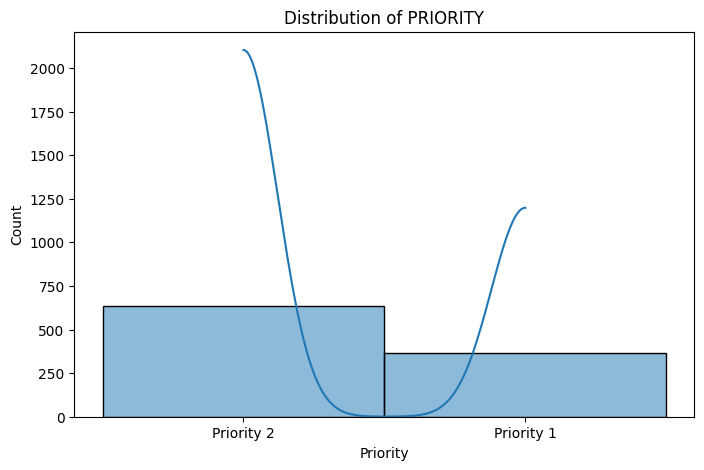

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Distribution of a numerical column
plt.figure(figsize=(8, 5))
sns.histplot(df["Priority"], bins=20, kde=True)
plt.title("Distribution of PRIORITY")
plt.show()


In [ ]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  # Display only columns with missing values



Unit_On_The_Way_Time       160
Unit_On_Scene_TimeStamp    174
On_Scene_Unit              174
dtype: int64

In [ ]:
df.fillna({'Dispatched_Time': 'Unknown', 'Street_Name': 'Unknown'}, inplace=True)


In [ ]:
df['Date_Time_Of_Event'] = pd.to_datetime(df['Date_Time_Of_Event'])
df['Dispatched_Time'] = pd.to_datetime(df['Dispatched_Time'], errors='coerce')
df['Cleared_TimeStamp'] = pd.to_datetime(df['Cleared_TimeStamp'], errors='coerce')


In [ ]:
df['Event_Hour'] = df['Date_Time_Of_Event'].dt.hour
df['Event_Day'] = df['Date_Time_Of_Event'].dt.day_name()
df['Event_Month'] = df['Date_Time_Of_Event'].dt.month


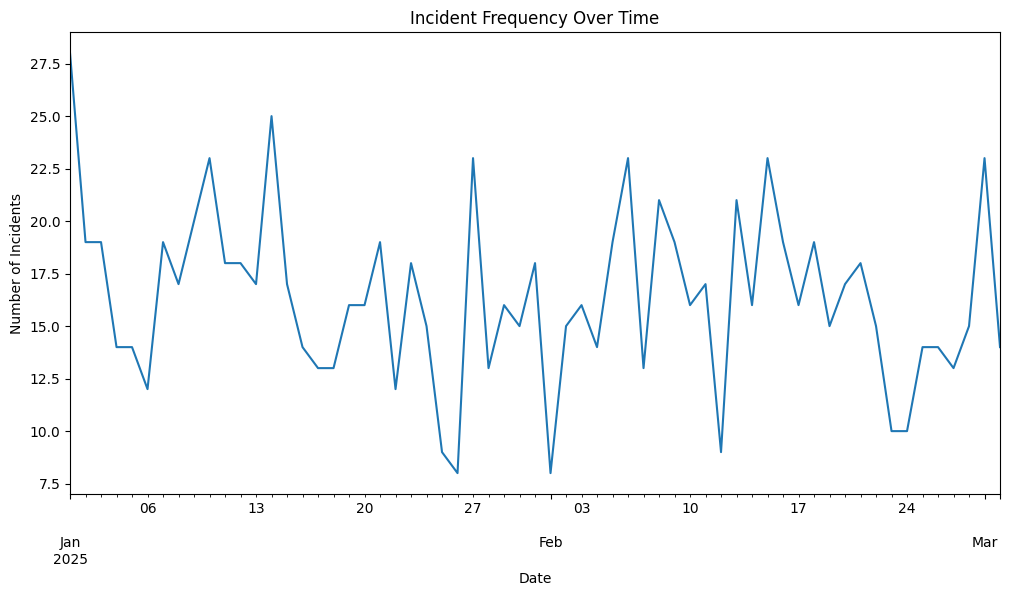

In [ ]:
df.set_index('Date_Time_Of_Event').resample('D').size().plot(title="Incident Frequency Over Time", figsize=(12,6))
plt.xlabel("Date")
plt.ylabel("Number of Incidents")
plt.show()


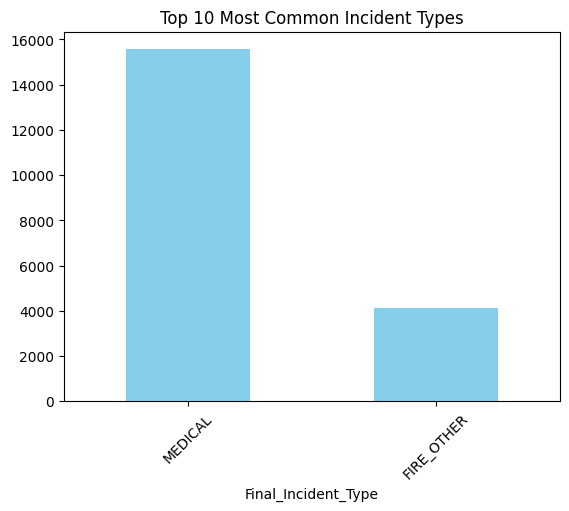

In [ ]:
#1️⃣ What are the top 10 most common incident types?
plt.figure(figsize=(10, 6))
df['Final_Incident_Type'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Incident Types")
plt.xticks(rotation=45)
plt.show()


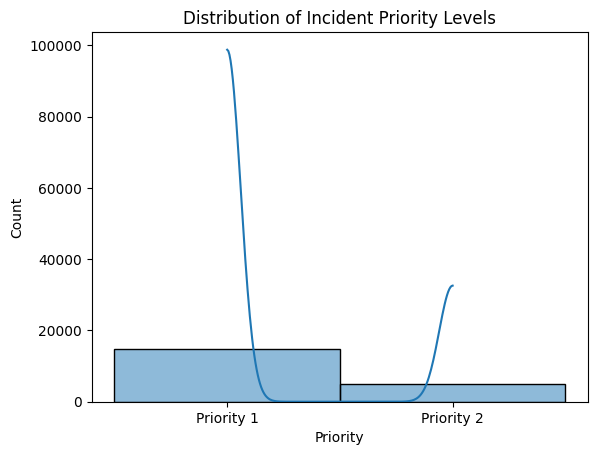

In [ ]:
#2️⃣ What is the distribution of incident priority levels?
plt.figure(figsize=(8, 5))
sns.histplot(df["Priority"], bins=10, kde=True)
plt.title("Distribution of Incident Priority Levels")
plt.show()


In [ ]:
import folium
from folium.plugins import MarkerCluster

# Create a base map (San Jose approx center)
m = folium.Map(location=[37.3382, -121.8863], zoom_start=12)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Add street names as markers (approximate positions)
for street in df['Street_Name'].unique():
    folium.Marker(
        location=[37.3382, -121.8863],  # Fixed location (San Jose center)
        popup=f"Incident on {street}",
        icon=folium.Icon(color="blue", icon="info-sign"),
    ).add_to(marker_cluster)

# Display the map
m



In [ ]:
#3️⃣ Where are incidents concentrated across different streets?
import folium
import numpy as np
from folium.plugins import HeatMap

# Create a base map (San Jose approx center)
m = folium.Map(location=[37.3382, -121.8863], zoom_start=12)

# Generate random offsets to spread markers
np.random.seed(42)  # Ensures consistent randomness
street_locations = {street: [37.3382 + np.random.uniform(-0.05, 0.05),
                             -121.8863 + np.random.uniform(-0.05, 0.05)]
                    for street in df['Street_Name'].unique()}

# Convert DataFrame to list of fake coordinates based on street names
heat_data = [street_locations[street] for street in df['Street_Name'] if street in street_locations]

# Add heatmap
HeatMap(heat_data).add_to(m)

# Display the map
m


In [ ]:
from google.cloud import bigquery
import pandas as pd


In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery

# Set project ID explicitly
project_id = "golden-photon-448607-m7"
client = bigquery.Client(project=project_id)


In [ ]:
datasets = list(client.list_datasets())
if datasets:
    print("Datasets in project:", [d.dataset_id for d in datasets])
else:
    print("No datasets found.")

# Check tables inside the dataset
dataset_id = "incident_data"  # Update if needed
tables = list(client.list_tables(f"{project_id}.{dataset_id}"))
print("Tables in dataset:", [t.table_id for t in tables])


Datasets in project: ['incident_data']
Tables in dataset: ['incident_calls']


In [ ]:
incident_calls_query = f"SELECT * FROM `{project_id}.incident_data.incident_calls` LIMIT 10"

df_calls = client.query(incident_calls_query).to_dataframe()
df_calls.head()


_id Incident_No   Date_Time_Of_Event Dispatched_Time Unit_On_The_Way_Time  \
0  2055  F250079129  01/07/2025 11:27 AM            None                 None   
1  4994  F250169130  01/16/2025 10:49 AM            None                 None   
2  6341  F250209119  01/20/2025 10:56 AM            None                 None   
3  7875  F250249299  01/24/2025 07:53 PM            None                 None   
4  9101  F250289216  01/28/2025 04:50 PM            None                 None   

  Unit_On_Scene_TimeStamp On_Scene_Unit    Cleared_TimeStamp  Unit_Count  \
0                    None          None  01/07/2025 11:36 AM           2   
1                    None          None  01/16/2025 10:56 AM           1   
2                    None          None  01/20/2025 11:04 AM           1   
3                    None          None  01/24/2025 07:58 PM           1   
4                    None          None  01/28/2025 04:57 PM           1   

     Priority Final_Incident_Type   Final_Incident_Category    Street_Name  \
0  Priority 2          FIRE_OTHER  False Alarm / False Call    MONTEREY RD   
1  Priority 2          FIRE_OTHER  False Alarm / False Call      E REED ST   
2  Priority 2          FIRE_OTHER  False Alarm / False Call       ABORN SQ   
3  Priority 2          FIRE_OTHER  False Alarm / False Call  GAUNDABERT LN   
4  Priority 2          FIRE_OTHER  False Alarm / False Call   E CAPITOL EX   

  Station Battalion  
0      27     BAT35  
1      03      BAT1  
2      24     BAT35  
3      13     BAT13  
4      24     BAT35

In [ ]:
# Define destination table
destination_table = f"{project_id}.incident_data.processed_incidents"

# Save DataFrame to BigQuery
df_calls.to_gbq(destination_table, project_id=project_id, if_exists="replace")

print("Data successfully saved to BigQuery!")


<ipython-input-28-15efcccdb1a4>:5: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  df_calls.to_gbq(destination_table, project_id=project_id, if_exists="replace")
100%|██████████| 1/1 [00:00<00:00, 4350.94it/s]

Data successfully saved to BigQuery!


In [ ]:
pip install streamlit google-cloud-bigquery pandas matplotlib seaborn


In [ ]:
import streamlit as st
import pandas as pd
from google.cloud import bigquery
import plotly.express as px



In [ ]:
datasets = list(client.list_datasets())
for dataset in datasets:
    print("Dataset:", dataset.dataset_id)

tables = list(client.list_tables("golden-photon-448607-m7.incident_data"))
for table in tables:
    print("Table:", table.table_id)


Dataset: incident_data
Table: incident_calls
Table: processed_incidents


In [ ]:
query = """
SELECT * FROM `golden-photon-448607-m7.incident_data.processed_incidents`
"""
df = client.query(query).to_dataframe()



In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery
client = bigquery.Client(project="golden-photon-448607-m7")  # Replace with your project ID
